In [1]:
import os
import random
from torchvision import models
import cv2

from config import *
from models.ResNet import *

from function.Image_processing import *
from function.Make_heatmap import *

# from Backprop.BackpropReLU import *
# from Backprop.GuidedBackpropReLU import *


## Control the position to adapt 'Grad-CAM'

In [2]:
final_layer = 'layer3'

In [3]:
import os
dataset = 'ImageNet'
dataset_path = '/data/ssd2/ImageNet/ImageNet_val/'

In [4]:

if dataset == 'ImageNet':
    num_class = 1000
    class_list = os.listdir(dataset_path)
    dataset_path = [dataset_path + class_name + '/' for class_name in class_list]
    
    print(len(dataset_path))

1000


In [5]:
test_list = []

for class_index in range(len(dataset_path)):
    file_list = os.listdir(dataset_path[class_index])
    file_list.sort()

    for file_index,filename in enumerate(file_list):
        test_list.append(dataset_path[class_index]+filename)

In [6]:
print(len(test_list))

50000


In [7]:
show_information = {}
for key, value in ImageNet_class_dict.items():
    show_information[value[0]] = [key,value[1]]
    

In [8]:
import random
index = random.randint(0,50000)
# index = 0
selected_dataset = test_list[index]
print(index,ImageNet_class_dict[selected_dataset.split('/')[-2]],selected_dataset)

16120 [774, 'sandal'] /data/ssd2/ImageNet/ImageNet_val/n04133789/ILSVRC2012_val_00027771.JPEG


In [9]:
img = cv2.imread(selected_dataset, 1)
img = np.float32(cv2.resize(img, (224, 224))) / 255
input = preprocess_image(img)
target_index = None

gradient = []
features = []
    

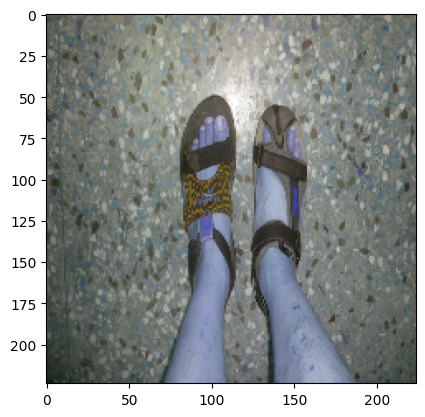

In [10]:
import matplotlib.pyplot as plt

# plt.title(f'class = {show_information[batch_labels]}')
plt.imshow(np.asarray(img*255,dtype=int))

In [11]:
from function.Grad_CAM_function import *
model1 = models.resnet18(pretrained=True)
grad_cam = GradCam_resnet(model=model1,target_layer_names=[final_layer],target_sub_layer_names=["conv2"],use_cuda=torch.cuda.is_available())

/home/eslab/anaconda3/envs/pytorch_2.0.1/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/eslab/anaconda3/envs/pytorch_2.0.1/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [12]:
# mask_gradcam, mask_cam,index, probs, idx = grad_cam(input, target_index)
features, gradients, params, index, probs, idx = grad_cam(input,target_index)
print('정답 : ',index,ImageNet_class_dict[selected_dataset.split('/')[-2]],selected_dataset)
if target_index==None: # 지정 target이 없을 경우 상위 2개의 class 정보 출력
    for i in range(0, 2):
        line = 'index : {} class\'s name : {:.3f} -> {}'.format(idx[i].item(),probs[i], show_information[idx[i].item()])
        print(line)
print("Class : ", show_information[index])

정답 :  774 [774, 'sandal'] /data/ssd2/ImageNet/ImageNet_val/n04133789/ILSVRC2012_val_00027771.JPEG
index : 774 class's name : 0.926 -> ['n04133789', 'sandal']
index : 770 class's name : 0.030 -> ['n04120489', 'running_shoe']
Class :  ['n04133789', 'sandal']


In [13]:
print(len(features),len(gradients))

4 4


In [14]:
for i in range(len(features)):
    print(features[i].shape,gradients[i].shape)

torch.Size([1, 64, 56, 56]) torch.Size([1, 512, 7, 7])
torch.Size([1, 128, 28, 28]) torch.Size([1, 256, 14, 14])
torch.Size([1, 256, 14, 14]) torch.Size([1, 128, 28, 28])
torch.Size([1, 512, 7, 7]) torch.Size([1, 64, 56, 56])


In [15]:
grad_cam_list = []

for i in range(len(features)):
    print(features[i].shape,gradients[-(i+1)].shape)
    grad_cam_list.append(make_heatmap_gradCAM(target=features[i],gradient=gradients[-(i+1)]))
   
cam_image = make_heatmap_CAM(features[-1],params=params,index=index)

torch.Size([1, 64, 56, 56]) torch.Size([1, 64, 56, 56])
torch.Size([1, 128, 28, 28]) torch.Size([1, 128, 28, 28])
torch.Size([1, 256, 14, 14]) torch.Size([1, 256, 14, 14])
torch.Size([1, 512, 7, 7]) torch.Size([1, 512, 7, 7])


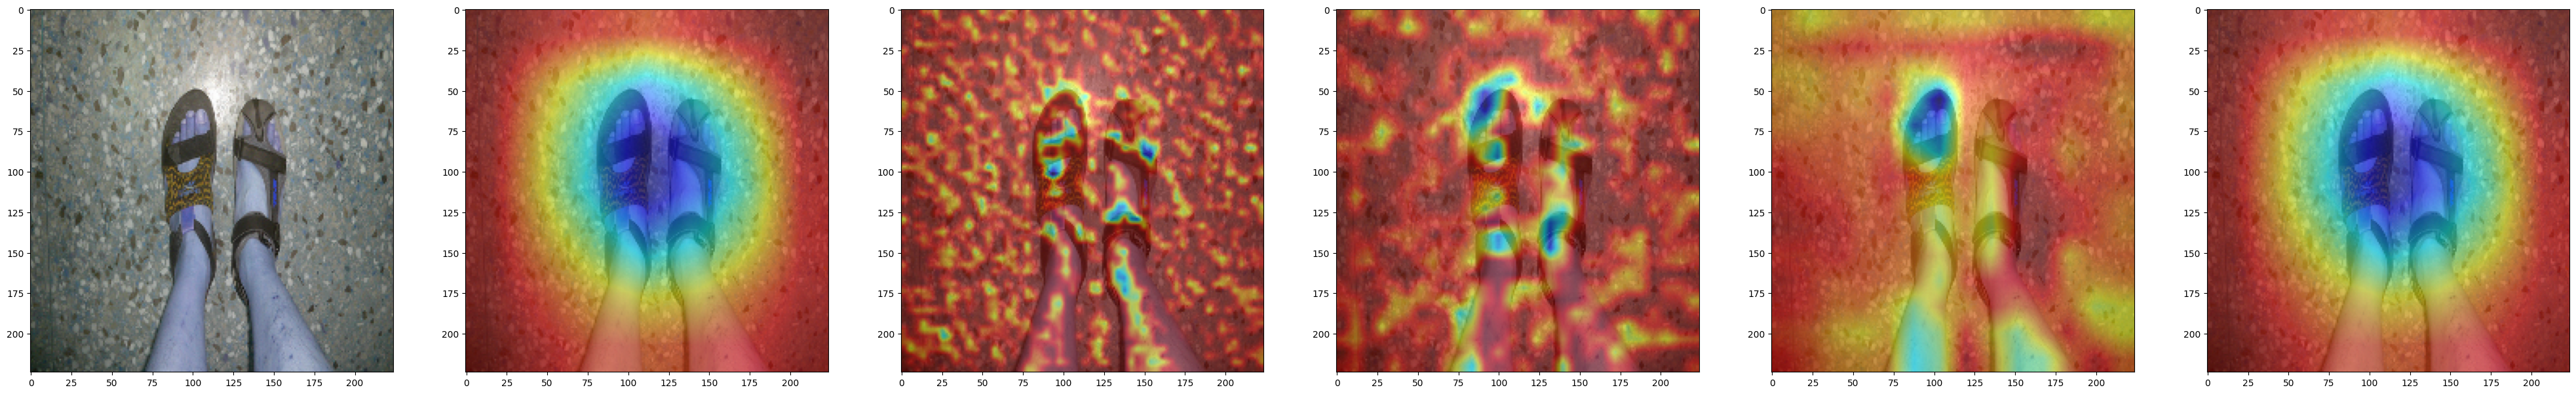

In [20]:

fig,ax = plt.subplots(1, len(grad_cam_list)+2, figsize=(50, 50*len(grad_cam_list)+2))
# plt.title(f'class = {show_information[batch_labels]}')
ax[0].imshow(np.asarray(img*255,dtype=int))
save_heatmap_cam= show_cam_on_image(img,cam_image)
ax[1].imshow(save_heatmap_cam)

for i in range(len(grad_cam_list)):
    save_heatmap_gradcam = show_cam_on_image(img, grad_cam_list[i])
    ax[i+2].imshow(save_heatmap_gradcam)

In [ ]:
grad_cam.extractor.gradients[0].shape

torch.Size([1, 512, 7, 7])